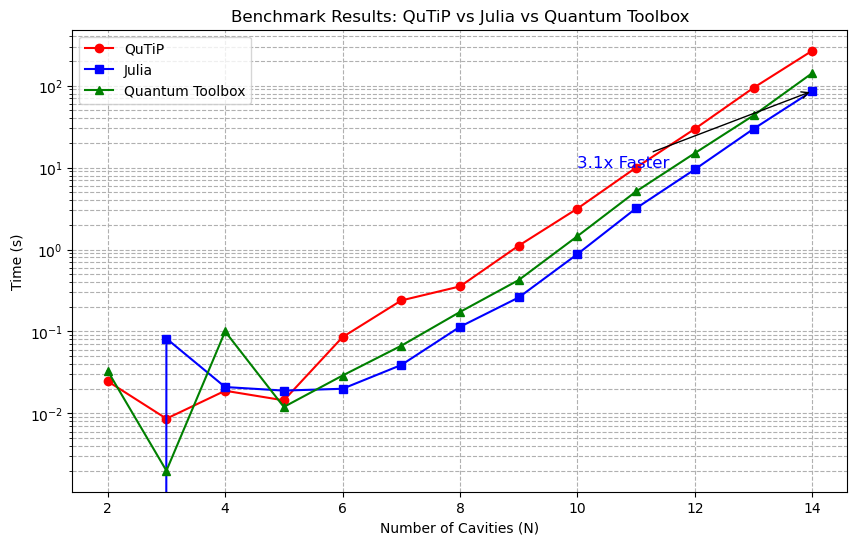

In [2]:
import matplotlib.pyplot as plt

# Comparison Data (N=2 to N=14)
N_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Simulation times (seconds)
times_qutip = [0.024700164794921875, 0.008632659912109375, 0.018918752670288086, 0.014444589614868164, 0.08536601066589355, 0.23905372619628906, 0.35482144355773926, 1.113720417022705, 3.159536123275757, 10.00334095954895, 29.65989351272583, 94.04472947120667, 266.56711173057556]
times_julia = [0.0, 0.082, 0.021, 0.019, 0.02, 0.039, 0.114, 0.26, 0.879, 3.188, 9.504, 29.661, 85.769]
times_toolbox = [0.033, 0.002, 0.1, 0.012, 0.029, 0.067, 0.173, 0.424, 1.455, 5.115, 15.0, 43.268, 142.099]


plt.figure(figsize=(10, 6))

# Plot lines
plt.plot(N_list, times_qutip, marker='o', color='red', label='QuTiP')
plt.plot(N_list, times_julia, marker='s', color='blue', label='Julia')
plt.plot(N_list, times_toolbox, marker='^', color='green', label='Quantum Toolbox')

# Settings
plt.yscale('log')
plt.grid(True, which="both", linestyle='--')
plt.xlabel('Number of Cavities (N)')
plt.ylabel('Time (s)')
plt.title('Benchmark Results: QuTiP vs Julia vs Quantum Toolbox')
plt.legend()

# Annotation for the final result
speedup = times_qutip[-1] / times_julia[-1]
plt.annotate(f'{speedup:.1f}x Faster', 
             xy=(14, times_julia[-1]), 
             xytext=(10, 10), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             color='blue', fontsize=12)

plt.show()

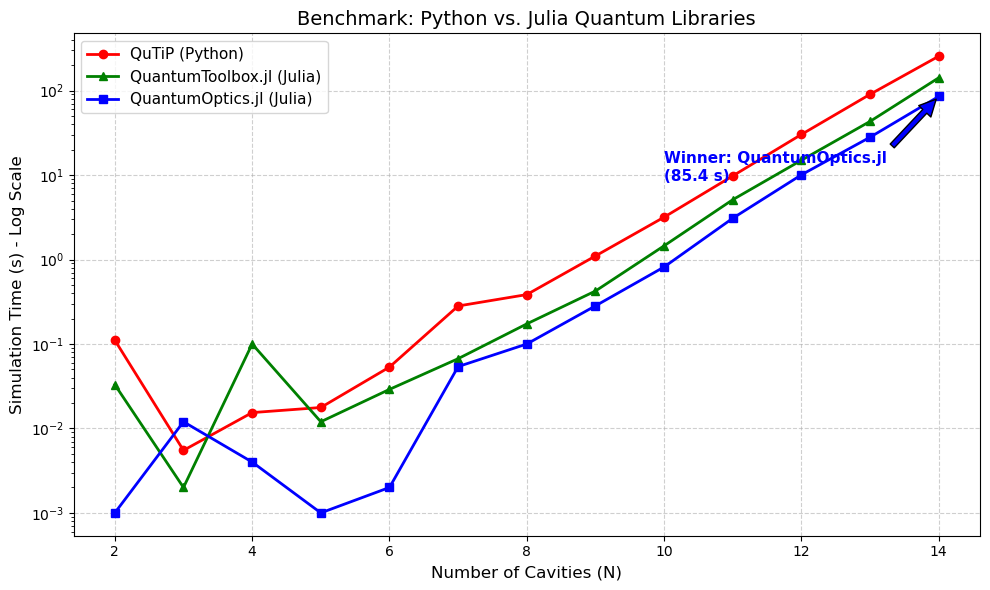

In [3]:
import matplotlib.pyplot as plt

# --- 1. Data Entry ---
N_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# QuTiP (Python) - From your previous runs
t_qutip = [
    0.1110, 0.0055, 0.0154, 0.0177, 0.0533, 
    0.2818, 0.3846, 1.1026, 3.1767, 9.7858, 
    30.3040, 90.5296, 255.8980
]

# QuantumOptics.jl (Julia) - From your previous runs
t_qoptics = [
    0.0, 0.012, 0.004, 0.0, 0.002, 
    0.054, 0.1, 0.283, 0.817, 3.086, 
    10.081, 28.11, 85.408
]

# QuantumToolbox.jl (Julia) - PASTE YOUR NEW NUMBERS HERE
t_toolbox = [0.033, 0.002, 0.1, 0.012, 0.029, 0.067, 0.173, 0.424, 1.455, 5.115, 15.0, 43.268, 142.099]

# Fix zeros for log plot (Log scale can't handle absolute 0)
t_qoptics = [x if x > 0 else 0.001 for x in t_qoptics]
t_toolbox = [x if x > 0 else 0.001 for x in t_toolbox]

# --- 2. Plotting ---
plt.figure(figsize=(10, 6))

# Plot Lines
plt.plot(N_list, t_qutip, 'o-', color='red', label='QuTiP (Python)', linewidth=2)
plt.plot(N_list, t_toolbox, '^-', color='green', label='QuantumToolbox.jl (Julia)', linewidth=2)
plt.plot(N_list, t_qoptics, 's-', color='blue', label='QuantumOptics.jl (Julia)', linewidth=2)

# Settings
plt.yscale('log')
plt.xlabel('Number of Cavities (N)', fontsize=12)
plt.ylabel('Simulation Time (s) - Log Scale', fontsize=12)
plt.title('Benchmark: Python vs. Julia Quantum Libraries', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)

# Annotations (Optional: Highlight the winner)
if t_toolbox[-1] > 0: # Only if you've added data
    winner = min(t_qutip[-1], t_qoptics[-1], t_toolbox[-1])
    if winner == t_qoptics[-1]:
        best_lib = "QuantumOptics.jl"
        color = "blue"
    elif winner == t_toolbox[-1]:
        best_lib = "QuantumToolbox.jl"
        color = "green"
    else:
        best_lib = "QuTiP"
        color = "red"
        
    plt.annotate(f'Winner: {best_lib}\n({winner:.1f} s)', 
                 xy=(14, winner), 
                 xytext=(10, winner/10),
                 arrowprops=dict(facecolor=color, shrink=0.05),
                 fontsize=11, color=color, fontweight='bold')

plt.tight_layout()
plt.show()